<a href="https://colab.research.google.com/github/amansingh202/Machine-Learning/blob/main/Deep_Learning/hw2_KUMAR_AMAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2
# AMAN KUMAR
# Hawk ID: A20538809
# CS 577

- I recommend that you start with "hw2.tex" first.
- When you turn in the assignment, do not clear the output.
- Make sure that your python notebook can run end-to-end with no mistake, in case the figures need to be reproduced.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# 1 Conditional Probability

## [2] point(s) --- part b:

- Complete this after you finish "1 Conditional Probability --- part a" from "hw2.tex".

- Generate `y = wx + b + eps` where `eps` is constructed by the pseudo code in "1 Conditional Probability --- part a".

- Your task is to generate `eps` by changing the line with the comment "# YOUR ANSWER HERE".

- Leave all other lines as is.

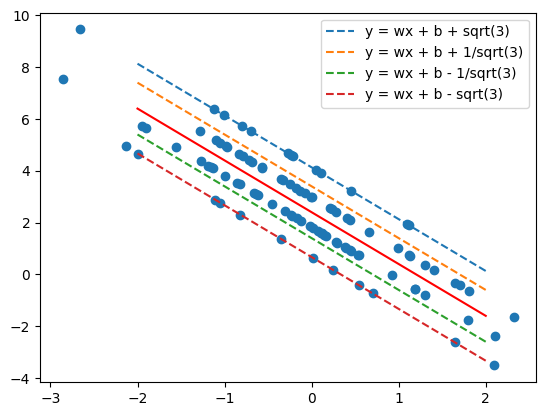

In [3]:
np.random.seed(1729)
N = 100
n = 3
w_star = -2.0
b_star = 2.4
x = np.random.randn(N)


# eps = np.random.randn(N)  # recall that in lecture, we had random gaussian
# eps = None # YOUR ANSWER HERE
steps = np.where(np.random.rand(N, n) < 0.5, 1, -1)
eps = steps.sum(axis=1) / np.sqrt(n)
y = w_star*x + b_star + eps

x_grid = np.linspace(-2,2)
plt.plot(x_grid, w_star*x_grid + b_star, color ='r')
plt.scatter(x,y)
plt.plot(x_grid, w_star * x_grid + b_star + np.sqrt(3), linestyle='--', label='y = wx + b + sqrt(3)')
plt.plot(x_grid, w_star * x_grid + b_star + 1, linestyle='--', label='y = wx + b + 1/sqrt(3)')
plt.plot(x_grid, w_star * x_grid + b_star - 1, linestyle='--', label='y = wx + b - 1/sqrt(3)')
plt.plot(x_grid, w_star * x_grid + b_star - np.sqrt(3), linestyle='--', label='y = wx + b - sqrt(3)')
plt.legend()
plt.show()

## [2] point(s) --- part c:

In the previous parts, you see should scatter points following 4 distinct lines.

- Calculate how many scatter points belong to each of the lines.
- Store the results into `n1,n2,n3,n4` such that `n1 >= n2 >= n3 >= n4`

In [4]:
# YOUR ANSWER HERE (use as many lines as needed)
line1 = w_star * x + b_star + np.sqrt(3)
line2 = w_star * x + b_star + 1/np.sqrt(3)
line3 = w_star * x + b_star - 1/np.sqrt(3)
line4 = w_star * x + b_star - np.sqrt(3)

dist1 = np.abs(y - line1)
dist2 = np.abs(y - line2)
dist3 = np.abs(y - line3)
dist4 = np.abs(y - line4)

distances = np.vstack((dist1, dist2, dist3, dist4)).T
closest_line = np.argmin(distances, axis=1)

n1 = np.sum(closest_line == 0)
n2 = np.sum(closest_line == 1)
n3 = np.sum(closest_line == 2)
n4 = np.sum(closest_line == 3)

n1, n2, n3, n4 = sorted([n1, n2, n3, n4], reverse=True)

total = n1+n2+n3+n4 # do not change this line
print(total)
print(n1/total, n2/total, n3/total, n4/total) # do not change this line

100
0.41 0.34 0.13 0.12


# 2 The Gaussian distribution

## [1] point(s) --- part c:

- Implement the data generative process from part a.

- Compute the number of elements of `y` that is between 1 ± 0.1. Store that into n1

- Compute the number of elements of `y` that is between -1/2 ± 0.1. Store that into n2

In [5]:
import numpy as np

N = 10000

np.random.seed(1729)

w = np.array([0,1])
b = 3
x = np.vstack([[1,-2] for _ in range(N)])

eps = np.random.normal(0,1/np.sqrt(2), size = N) # YOUR ANSWER HERE (only modify this line)

y = x@w + b + eps

n1 = np.sum((y >= 0.9) & (y <= 1.1)) # YOUR ANSWER HERE (only modify this line)
n2 = np.sum((y >= -0.6) & (y <= -0.4)) # YOUR ANSWER HERE (only modify this line)

print(n1/n2)

8.325757575757576


# 3 Gradient descent for nonlinear regression

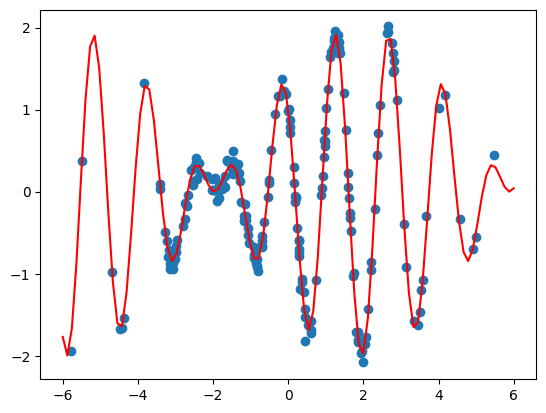

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

N = 200

np.random.seed(1729)

w1_star = -4.0
w2_star = 4.8

x = np.concatenate([1.5*(np.random.randn(N//2)-1), 1.5*(np.random.randn(N//2)+1)])
eps = (1/10)*np.random.randn(N)

y = np.sin(w1_star*x) + np.cos(w2_star*x)+eps

plt.scatter(x,y)

x_grid = np.linspace(-6,6,100)
plt.plot(x_grid, np.sin(w1_star*x_grid) + np.cos(w2_star*x_grid), color ='r')

## [1] points --- part b

In [7]:
def J(w1,w2):
    predictions = np.sin(w1 * x) + np.cos(w2 * x)# YOUR CODE HERE
    mse = (1/N)*np.sum((y - predictions) ** 2)
    return mse

def dJdw1(w1, w2):
    N = len(y)
    predictions = np.sin(w1 * x) + np.cos(w2 * x)
    grad_w1 = (-2/N)*np.sum((y - predictions)* x * np.cos(w1 * x))# YOUR CODE HERE
    return grad_w1


def dJdw2(w1, w2):
    predictions = np.sin(w1 * x) + np.cos(w2 * x)
    N = len(y)
    grad_w2 = (2/N)*np.sum((y - predictions)* x * np.sin(w2 * x))# YOUR CODE HERE
    return grad_w2


## [4] points --- part c

For this part, only your response in `hw2.tex` will be graded. You can use as many code blocks below as you like.

In [8]:
## initialization A
w1_a = -2.5
w2_a = 3.5

## initialization B
w1_b = -2.5
w2_b = 3.57

In [9]:
alpha = 1/4 #learning rate
steps = 100 #number of iterations

In [10]:
def gradient_descent(w1_init, w2_init, alpha, steps):
    w1, w2 = w1_init, w2_init
    before = [(w1, w2, J(w1, w2))]
    for i in range(steps):
        w1 -= alpha * dJdw1(w1, w2)
        w2 -= alpha * dJdw2(w1, w2)
        before.append((w1, w2, J(w1, w2)))
    return w1, w2, before
w1_A, w2_A, gradient_descent_A = gradient_descent(w1_a, w2_a, alpha, steps)
w1_B, w2_B, gradient_descent_B = gradient_descent(w1_b, w2_b, alpha, steps)

In [11]:
# plot_J_surface() # you might find plotting the J function helpful
def plot_J_surface(alpha=1.0):
    w1_values = np.linspace(-6, 1, 100)
    w2_values = np.linspace(-1, 6, 100)
    W, B = np.meshgrid(w1_values, w2_values)
    Z = np.array([[J(w1,w2) for w1 in w1_values] for w2 in w2_values])
    fig = go.Figure(data=[go.Surface(z=Z, x=w1_values, y=w2_values,opacity=alpha)])
    fig.update_layout(title='J(w1, w2) surface plot',
                      scene=dict(xaxis_title='w1',
                                 yaxis_title='w2',
                                 zaxis_title='MSE') ,
                      width=800, height=600)
    return fig
def plot_line_segment(fig, history, color='blue'):
    w1_values = [point[0] for point in history]
    w2_values = [point[1] for point in history]
    mse_values = [point[2] for point in history]
    fig.add_trace(go.Scatter3d(x=w1_values, y=w2_values, z=mse_values,
                               mode='lines',
                               line=dict(color=color, width=2),
                               name='Gradient Descent Path'))
def plot_point(fig, w, b, color='red'):
    mse = J(w, b)
    fig.add_trace(go.Scatter3d(x=[w], y=[b], z=[mse],
                               mode='markers',
                               marker=dict(size=5, color=color),
                               name=f'Point (w={w}, b={b})'))


In [12]:
fig = plot_J_surface()
plot_line_segment(fig, gradient_descent_A, color='blue')
plot_line_segment(fig, gradient_descent_B, color='green')
plot_point(fig, gradient_descent_A[0][0], gradient_descent_A[0][1], color='red')  # Starting point for A
plot_point(fig, gradient_descent_A[-1][0], gradient_descent_A[-1][1], color='red')  # Final point for A
plot_point(fig, gradient_descent_B[0][0], gradient_descent_B[0][1], color='yellow')  # Starting point for B
plot_point(fig, gradient_descent_B[-1][0], gradient_descent_B[-1][1], color='yellow')  # Final point for B
fig.show()

## [10 bonus] points --- part d

In [15]:
def print_results():
    def path_details(gradient_descent_result, label):
        print(f"\n{label} Path:")
        for i, (w1, w2, mse) in enumerate(gradient_descent_result):
            print(f"Step {i}: w1 = {w1:.2f}, w2 = {w2:.2f}, MSE = {mse:.2f}")

    path_details(gradient_descent_A, "Initialization A")
    path_details(gradient_descent_B, "Initialization B")

In [16]:
print_results()


Initialization A Path:
Step 0: w1 = -2.50, w2 = 3.50, MSE = 2.32
Step 1: w1 = -2.49, w2 = 3.52, MSE = 2.32
Step 2: w1 = -2.47, w2 = 3.54, MSE = 2.32
Step 3: w1 = -2.45, w2 = 3.57, MSE = 2.31
Step 4: w1 = -2.41, w2 = 3.60, MSE = 2.30
Step 5: w1 = -2.36, w2 = 3.65, MSE = 2.27
Step 6: w1 = -2.29, w2 = 3.72, MSE = 2.23
Step 7: w1 = -2.21, w2 = 3.81, MSE = 2.15
Step 8: w1 = -2.12, w2 = 3.98, MSE = 1.98
Step 9: w1 = -2.05, w2 = 4.26, MSE = 1.55
Step 10: w1 = -2.01, w2 = 4.66, MSE = 1.05
Step 11: w1 = -2.00, w2 = 4.81, MSE = 1.01
Step 12: w1 = -2.01, w2 = 4.76, MSE = 1.01
Step 13: w1 = -2.01, w2 = 4.78, MSE = 1.01
Step 14: w1 = -2.01, w2 = 4.77, MSE = 1.01
Step 15: w1 = -2.01, w2 = 4.78, MSE = 1.01
Step 16: w1 = -2.01, w2 = 4.78, MSE = 1.01
Step 17: w1 = -2.01, w2 = 4.78, MSE = 1.01
Step 18: w1 = -2.01, w2 = 4.78, MSE = 1.01
Step 19: w1 = -2.01, w2 = 4.78, MSE = 1.01
Step 20: w1 = -2.01, w2 = 4.78, MSE = 1.01
Step 21: w1 = -2.01, w2 = 4.78, MSE = 1.01
Step 22: w1 = -2.01, w2 = 4.78, MSE = 1.